In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import interp1d
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
  "font.size": 10,
  "axes.labelsize": 10,
  "xtick.labelsize": 10,
  "ytick.labelsize": 10,
  "legend.fontsize": 8,
})
plt.style.use(['science', 'ieee', 'grid'])
from IPython.display import display
from sympy.printing import latex

In [2]:
U_N=400
U_L=85
n=1400/60
f=50
ue=U_N/U_L

In [3]:
I1=[1,2,3,4,4.2,5]
P_A=[0,-8,-16,-28,-28,-30]
P_B=[28,100,210,380,420,500]
P_1=[]
U=[27.5,55,82,107,113,134]
G=[35,85,222,426,464,685]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000

# pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/anlaufmoment.tex", index=False)
pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"])

,$$I_1[A]$$,$$P_A[W]$$,$$P_B[W]$$,$$P_1[W]$$,$$U[V]$$,$$G[g]$$,$$M_{an}[Nm]$$
0,1.0,0,28,28,27.5,35,0.137340
1,2.0,-8,100,92,55.0,85,0.333540
2,3.0,-16,210,194,82.0,222,0.871128
3,4.0,-28,380,352,107.0,426,1.671624
4,4.2,-28,420,392,113.0,464,1.820736
5,5.0,-30,500,470,134.0,685,2.687940


0.00019869525677184555 -0.007889440176336464 0.1909776043553698  
0.1511 x - 0.07306
korrelation koeffizient - U^2:  0.9978360276274117
korrelation koeffizient - U:  0.9693946438232869


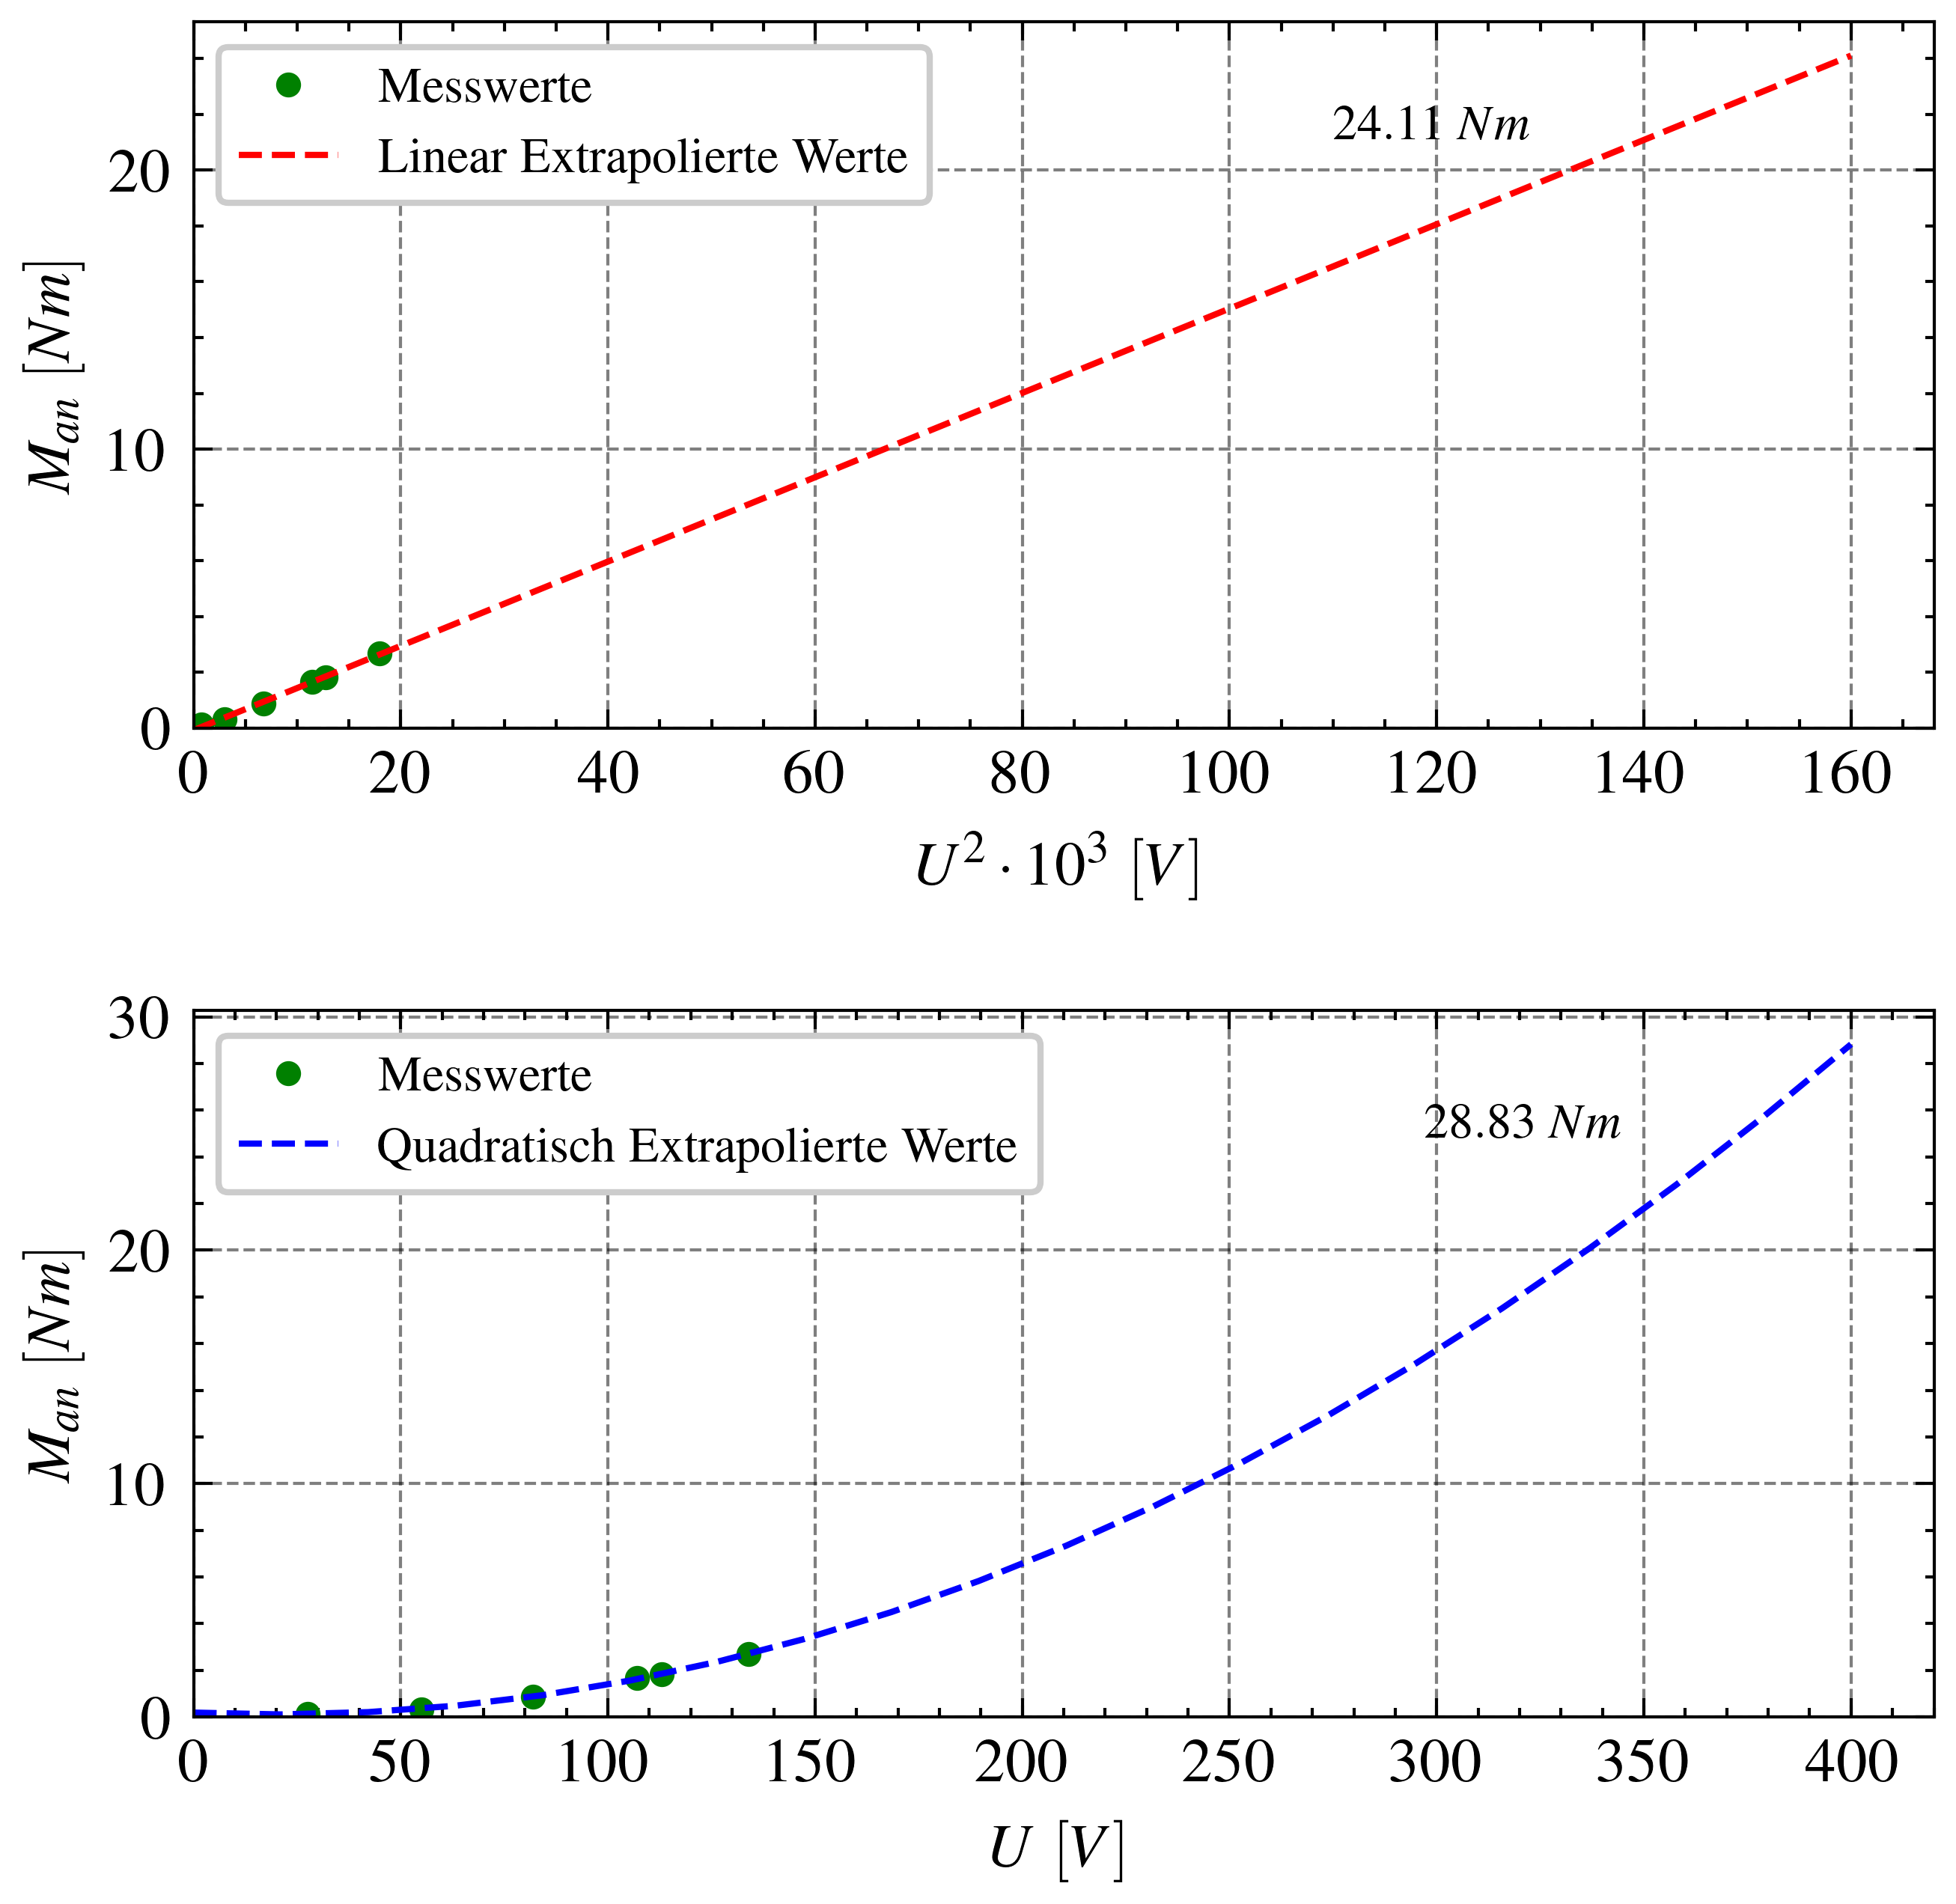

In [4]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)

plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/anlaufmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])

In [5]:

I1=[1,2,3,4,4.2,5]
P_A=[8,28,60,110,125,180]
P_B=[16,74,320,560,620,866]
P_1=[]
U=[36,73,108,140,148,175]
G=[32,218,508,891,1000,1425]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000
# pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/kippmoment.tex", index=False)
pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"])

,$$I_1[A]$$,$$P_A[W]$$,$$P_B[W]$$,$$P_1[W]$$,$$U[V]$$,$$G[g]$$,$$M_{an}[Nm]$$
0,1.0,8,16,24,36,32,0.125568
1,2.0,28,74,102,73,218,0.855432
2,3.0,60,320,380,108,508,1.993392
3,4.0,110,560,670,140,891,3.496284
4,4.2,125,620,745,148,1000,3.924000
5,5.0,180,866,1046,175,1425,5.591700


0.0001976055935301472 -0.002449525260579079 -0.035841563102510736  
0.1863 x - 0.1431
korrelation koeffizient - U^2:  0.999921462865454
korrelation koeffizient - U:  0.9802427097922084


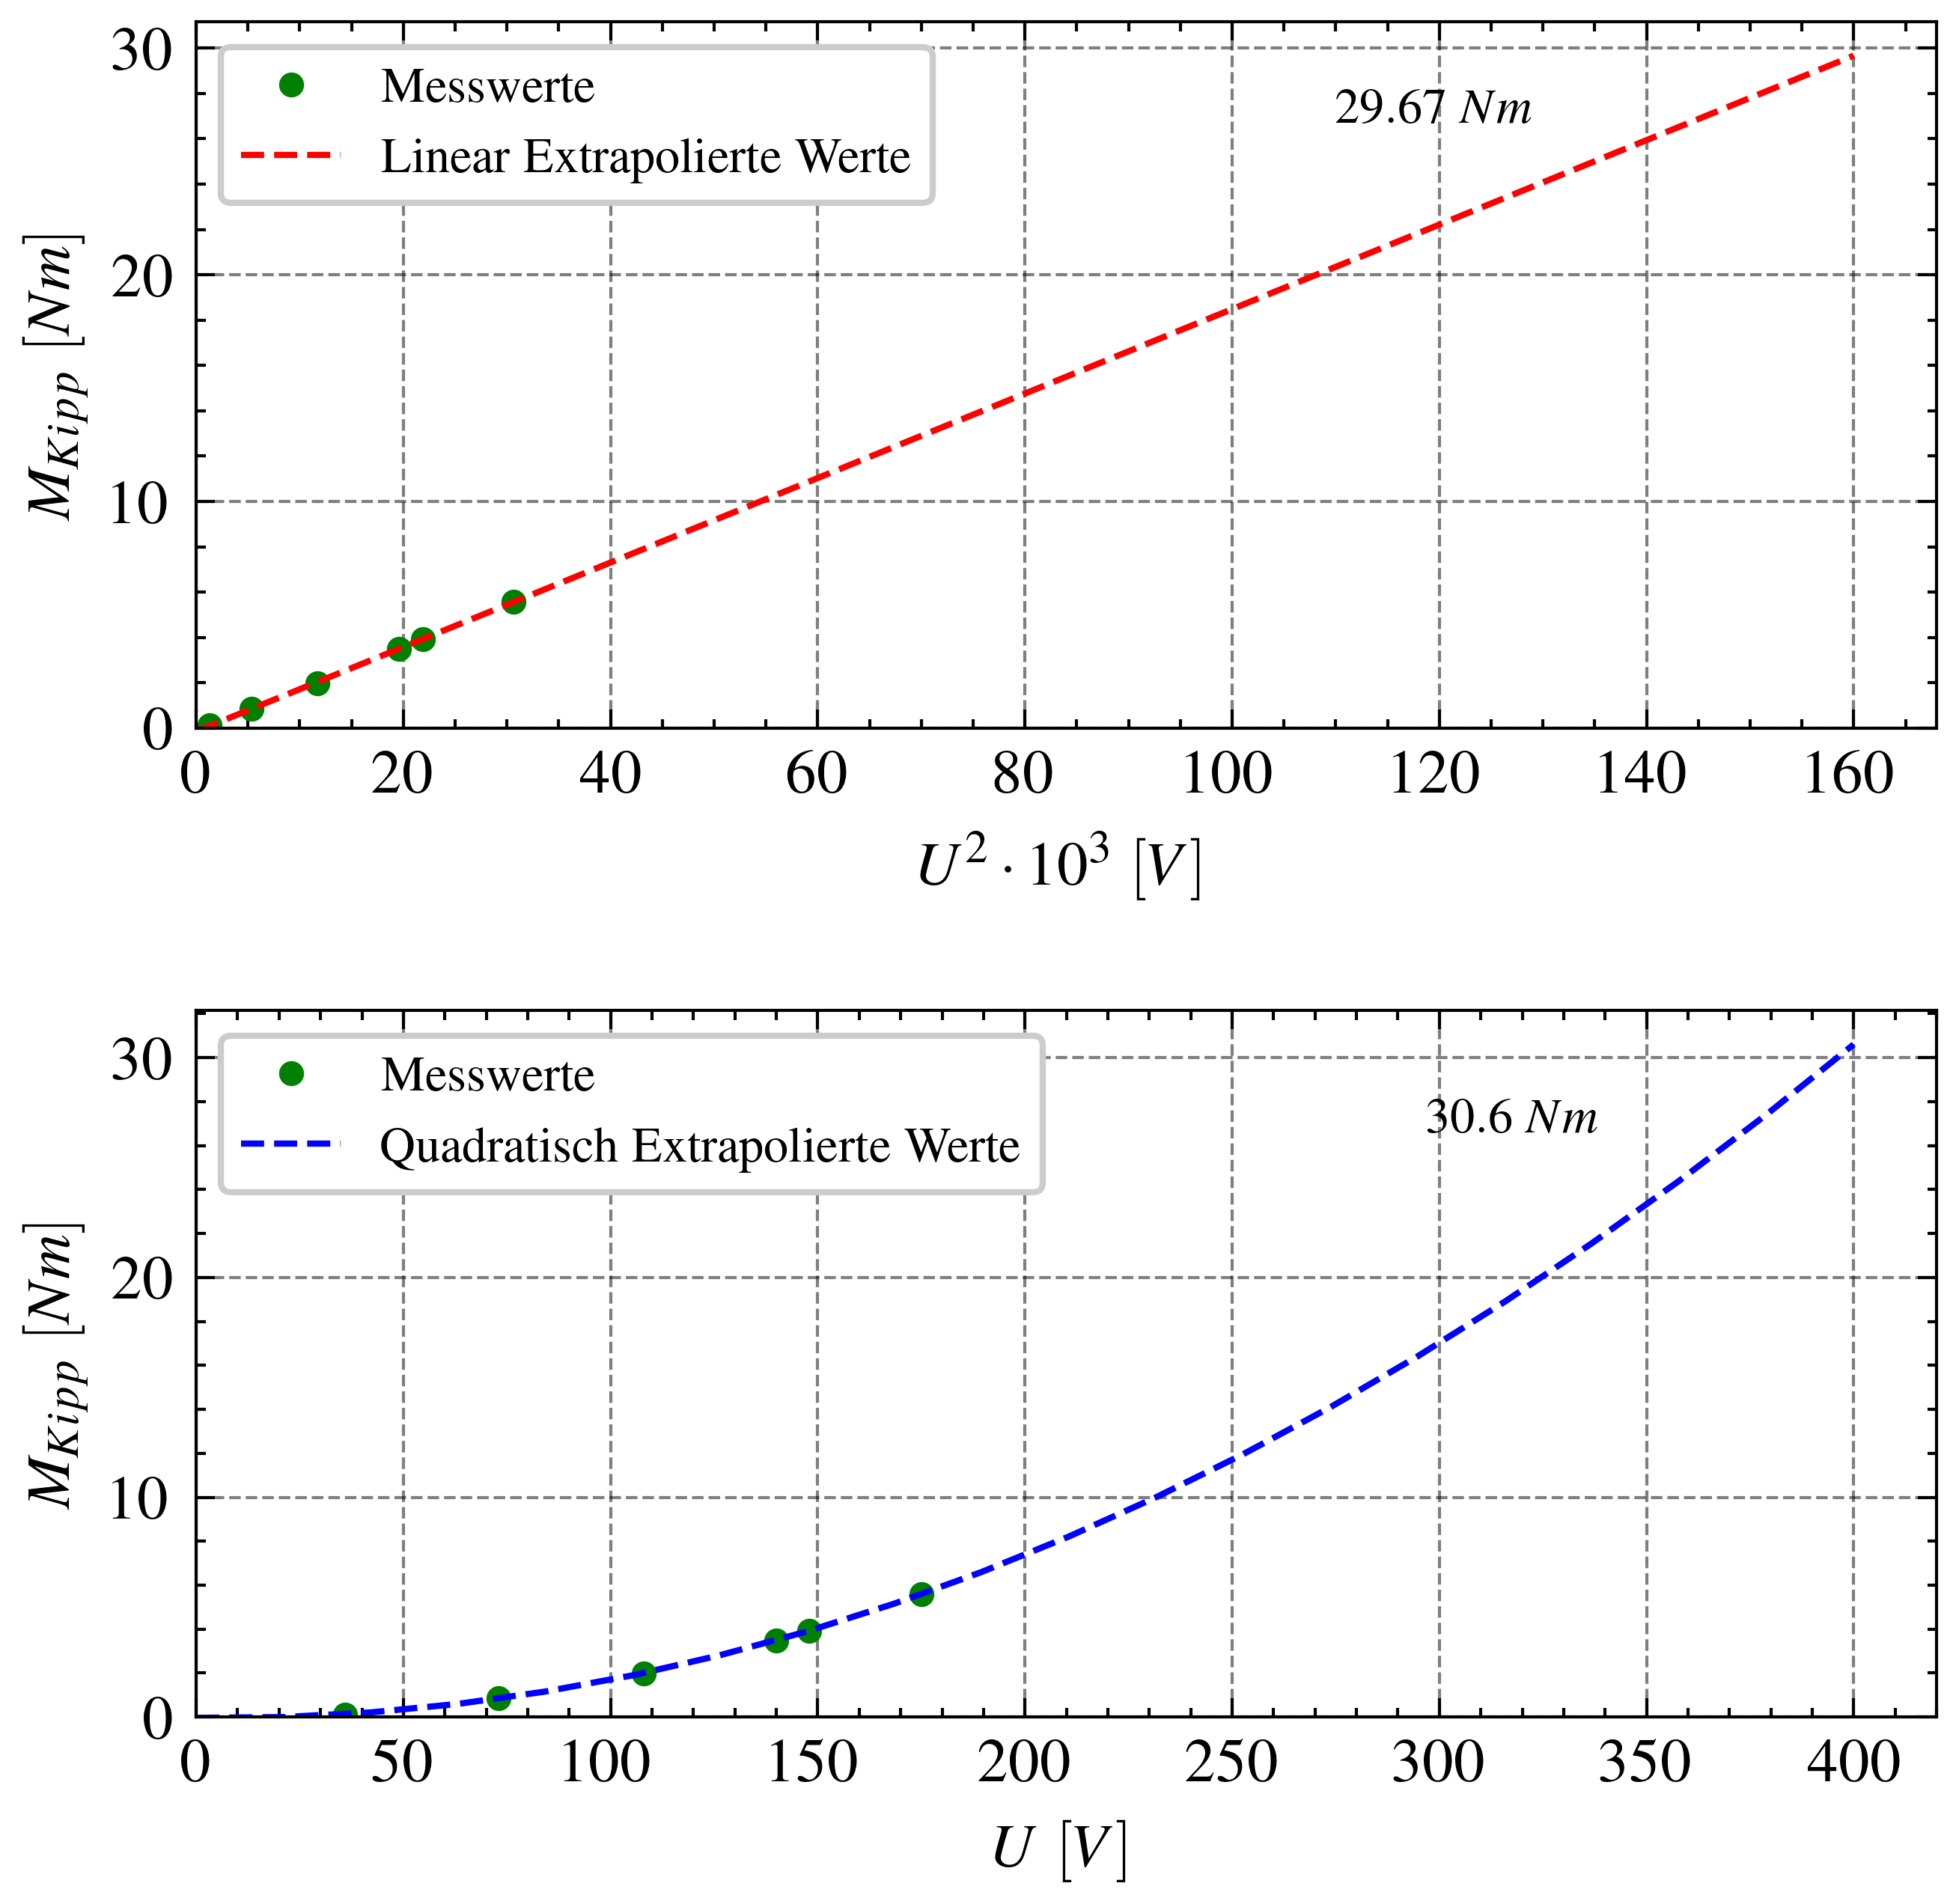

In [6]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)

plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/kippmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])

### 5.4 Trennung von Eisen- und Reibungsverlusten

In [7]:
I_0=np.array([2.75,1.7,1.1,0.58])
P_A=np.array([-440,-200,-70,-8])
P_B=np.array([680,340,150,52])
P_0=P_A+P_B
U=np.array([400,300,200,100])
U_pow2=U**2
n_min=np.array([1493,1490,1485,1461])
n_sec=n_min/60
P_Cu=3*I_0*2.32
P_FeReib=P_0-P_Cu
data=[]

for x in range(len(U)):
    data.append([I_0[x],P_0[x],P_Cu[x],P_FeReib[x],U[x],n_min[x]])
# pd.DataFrame([I_0,P_0,P_Cu,P_FeReib,U,n_min], columns=["I1","P_A","P_B","P_1","U","G"])
# pd.DataFrame(data, columns=["$$I_0[A]$$","$$P_0[W]$$","$$P_{Cu}[W]$$","$$P_{Fe+Reib}[W]$$","$$U[V]$$","$$n[min]$$"]).to_latex("tables/trennung_eisen_reib.tex", index=False)
pd.DataFrame(data, columns=["$$I_0[A]$$","$$P_0[W]$$","$$P_{Cu}[W]$$","$$P_{Fe+Reib}[W]$$","$$U[V]$$","$$n[min]$$"])

,$$I_0[A]$$,$$P_0[W]$$,$$P_{Cu}[W]$$,$$P_{Fe+Reib}[W]$$,$$U[V]$$,$$n[min]$$
0,2.75,240,19.1400,220.8600,400,1493
1,1.70,140,11.8320,128.1680,300,1490
2,1.10,80,7.6560,72.3440,200,1485
3,0.58,44,4.0368,39.9632,100,1461


 
1.207 x + 24.83


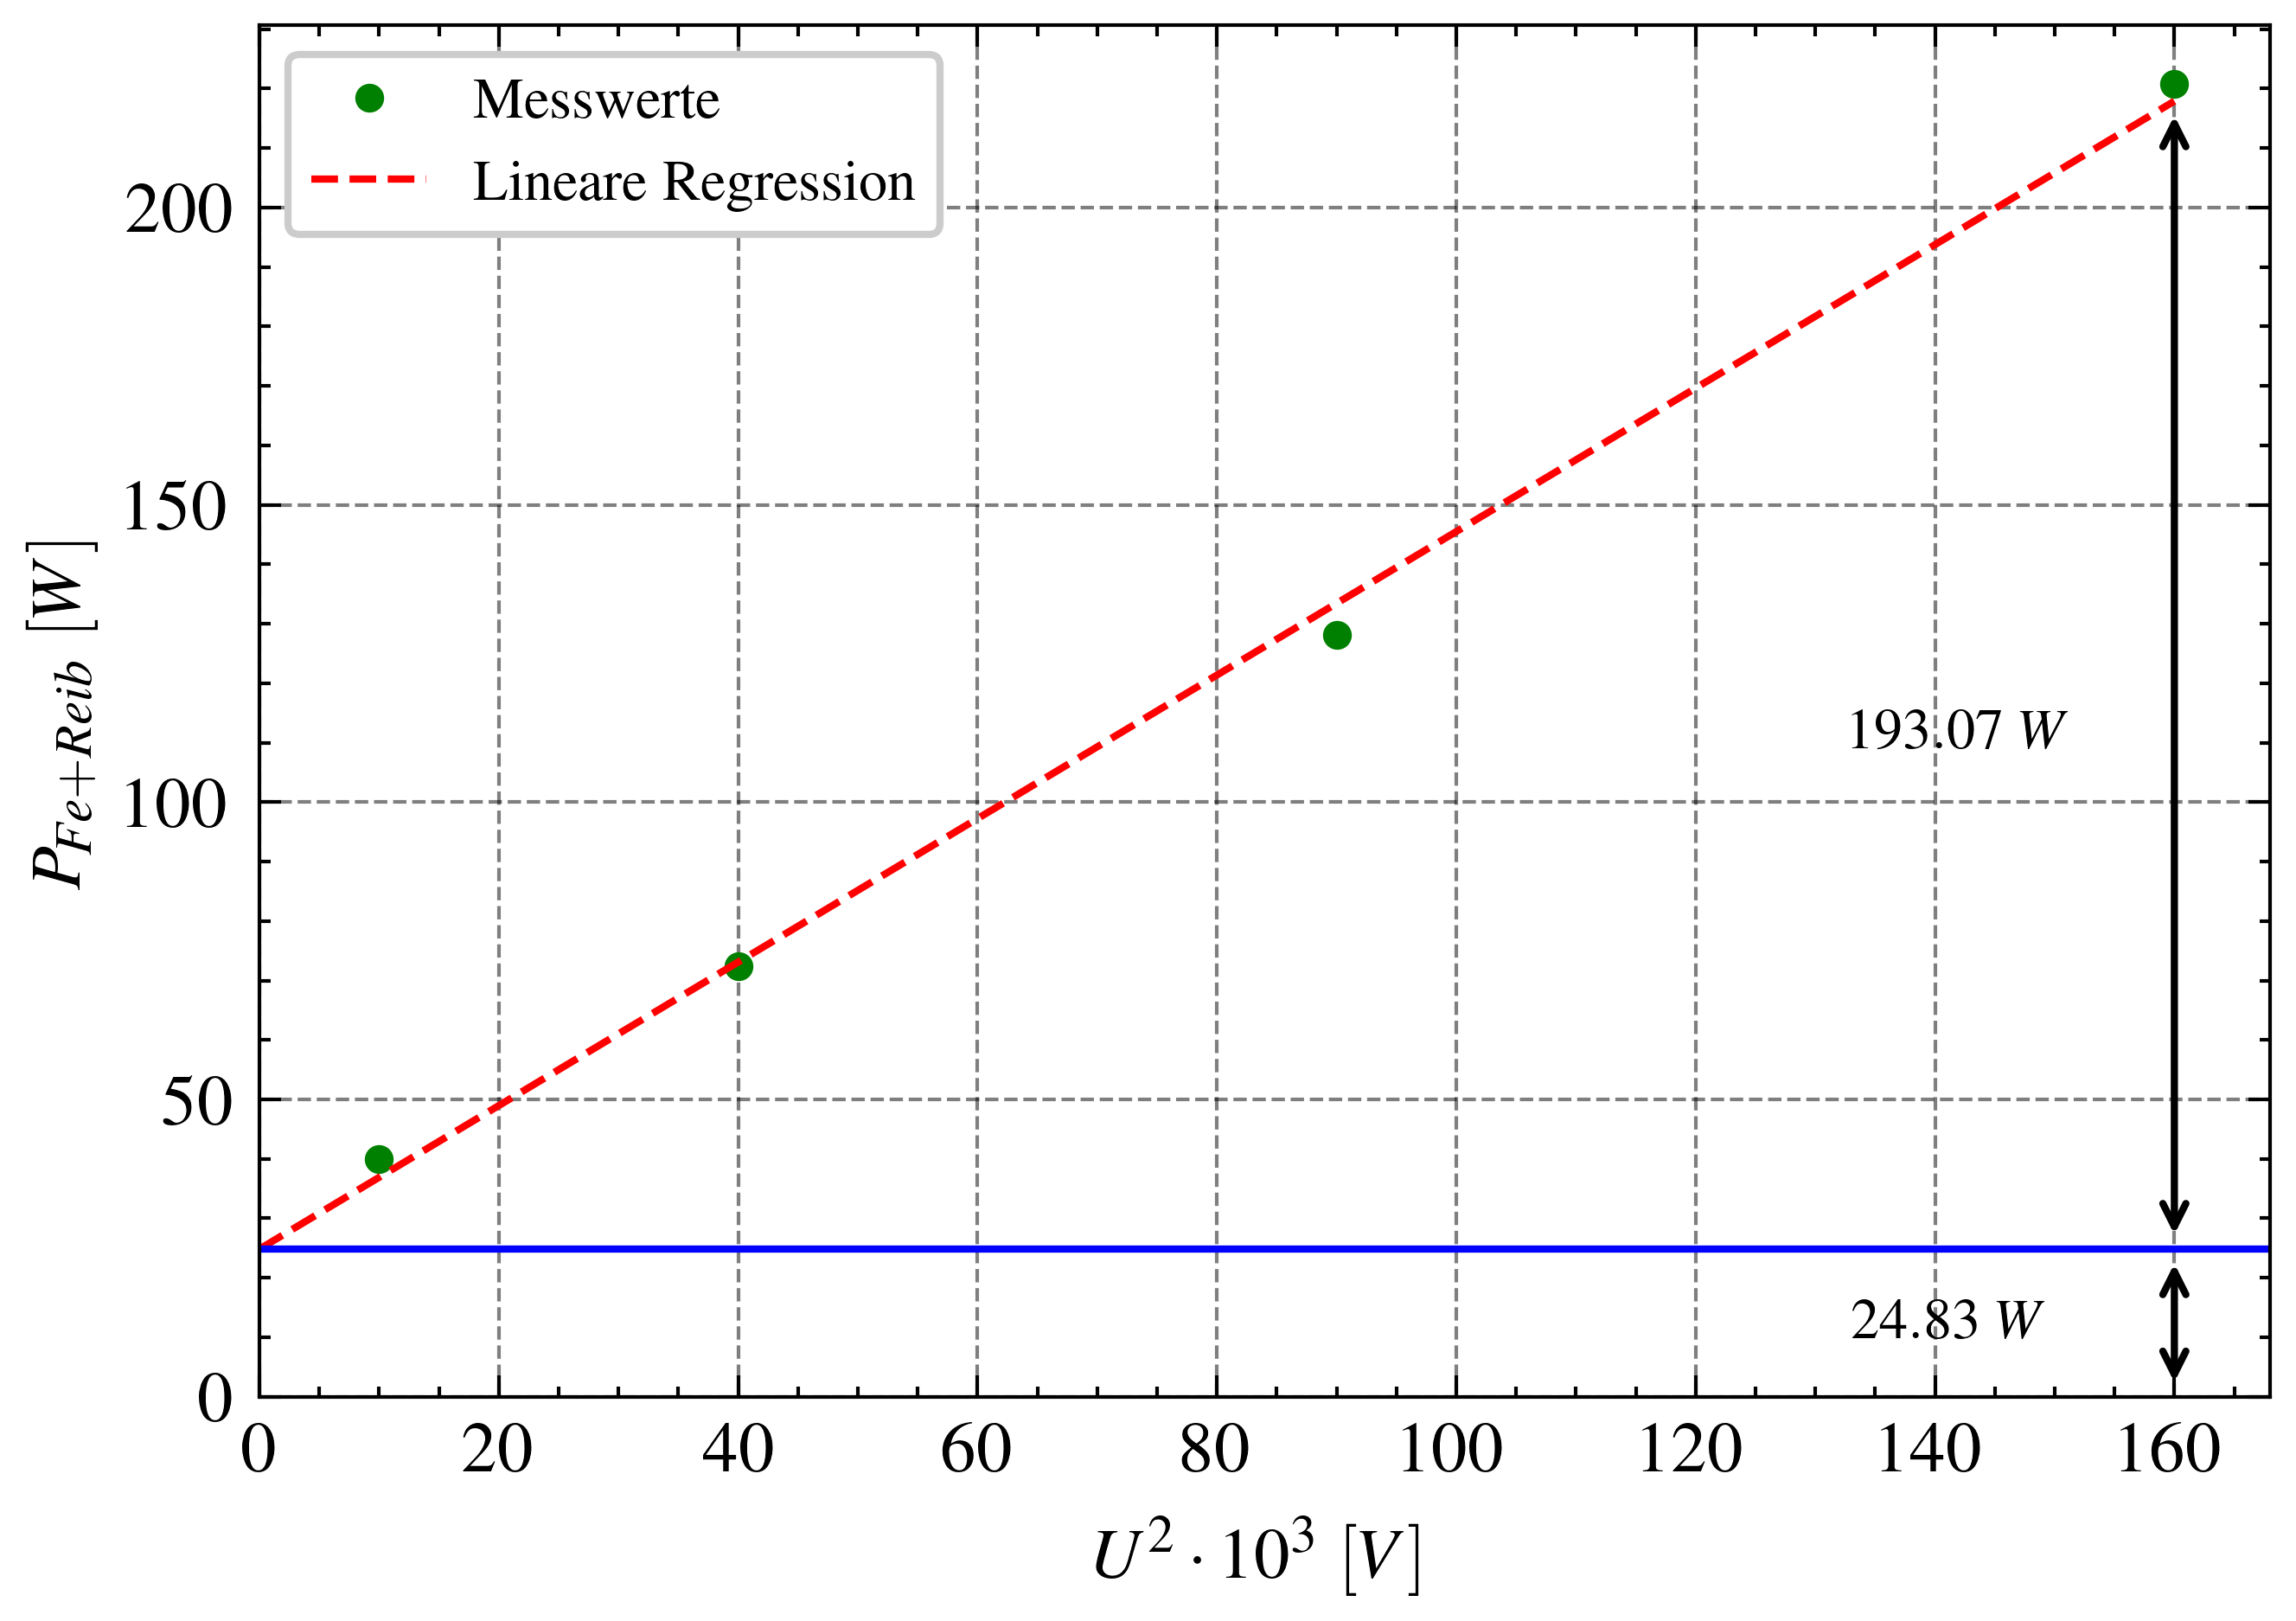

In [8]:
z=np.polyfit(U_pow2/1000,P_FeReib,1)
p=np.poly1d(z)
U_=np.linspace(0,160,20)
offset=27
plt.figure(figsize=(5,3.5))
plt.plot(U_pow2/1000,P_FeReib, 'g.', label="Messwerte")
plt.plot(U_,p(U_), 'r--', label="Lineare Regression")
plt.axhline(y=p(0), color='b', linestyle='-')
plt.annotate(f'${round(p(0), 2)}\ W$', xy=(max(U_)-offset, p(0)-15))
plt.annotate(f'${round(max(p(U_))-p(0), 2)}\ W$', xy=(max(U_)-offset, max(p(U_))/2))
plt.annotate("", xy=(max(U_),max(p(U_))),xycoords='data',
            xytext=(max(U_), p(0)), textcoords='data',
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))

plt.annotate("", xy=(max(U_),p(0)),xycoords='data',
            xytext=(max(U_), 0), textcoords='data',
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.xlabel("$U^2\cdot 10^3 \ [V]$")
plt.ylabel("$P_{Fe+Reib} \ [W]$")
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/trennung_eisen_reib.pdf")
print(p)

### 5.5 M/n Kennlinie

In [9]:
R_2_prime, X_sigma, R_1, s_k = sp.symbols('R_2^{\prime}, X_sigma, R_1, s_k')
# R_2_prime = 5.80
# X_sigma = 13.652
# R_1 = 2.82
s_k = R_2_prime / X_sigma
print(latex(s_k), '=' ,s_k.subs(R_2_prime, 5.80).subs(X_sigma, 13.652))

\frac{R_2^{\prime}}{X_{\sigma}} = 0.424846176384413


In [10]:
s_k = R_2_prime / sp.sqrt(R_1**2 + X_sigma**2)
data_s_k = s_k.subs(R_2_prime, 4.77).subs(X_sigma, 13.652).subs(R_1, 2.32)
print(latex(s_k), '=' ,s_k.subs(R_2_prime, 5.8).subs(X_sigma, 13.652).subs(R_1, 2.82))

\frac{R_2^{\prime}}{\sqrt{R_{1}^{2} + X_{\sigma}^{2}}} = 0.416062546148243


In [11]:
M_k, U_1, n_1 = sp.symbols('M_k, U_1, n_1')

expr_M_k = sp.Eq(M_k, U_1**2/(4*sp.pi*n_1)*1/(R_1 + sp.sqrt(R_1**2 + X_sigma**2)))
data_M_k = expr_M_k.subs(U_1, 400).subs(n_1, 1440/60).subs(R_1, 2.82).subs(X_sigma, 13.652).evalf().rhs
print(latex(expr_M_k), latex(expr_M_k.subs(U_1, 400).subs(n_1, 1440/60).subs(R_1, 2.82).subs(X_sigma, 13.652).evalf()))
data_M_k

M_{k} = \frac{U_{1}^{2}}{4 \pi n_{1} \left(R_{1} + \sqrt{R_{1}^{2} + X_{\sigma}^{2}}\right)} M_{k} = 31.6533278022819


31.6533278022819

In [12]:
expr_M_k_approx = sp.Eq(M_k, U_1**2/(4*sp.pi*n_1)*1/X_sigma)
print(latex(expr_M_k_approx), latex(expr_M_k_approx.subs(U_1, 400).subs(n_1, 1500/60).subs(R_1, 2.82).subs(X_sigma, 13.652).evalf()))
expr_M_k_approx

M_{k} = \frac{U_{1}^{2}}{4 \pi X_{\sigma} n_{1}} M_{k} = 37.3055829104941


Eq(M_k, U_1**2/(4*pi*X_sigma*n_1))

In [13]:
s, M, s_k = sp.symbols('s, M, s_k')
expr_M = sp.Eq(M, M_k*(2/((s/s_k)+(s_k/s))))

data_s = np.arange(-0.5, 1.25, 0.25)
data_n1 = 1500-1500*data_s
display(expr_M.rhs)

expr_M_lambdified = sp.lambdify([M_k, s, s_k], expr_M.rhs)
y_data = expr_M_lambdified(data_M_k, data_s, data_s_k).astype(float)
# print(data_n1)

data=[]
for x in range(len(data_s)):
    data.append([data_s[x], round(expr_M_lambdified(data_M_k, data_s[x], data_s_k), 2), int(data_n1[x])])

display(pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]))
# pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]).to_latex("tables/klossche_gleichung.tex", index=False)
# pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]).to_excel("excel/klossche_gleichung.xlsx", index=False)


2*M_k/(s/s_k + s_k/s)

,$$s$$,$$M$$,$$n_1$$
0,-0.50,-29.58,2250
1,-0.25,-30.09,1875
2,0.00,0,1500
3,0.25,30.09,1125
4,0.50,29.58,750
5,0.75,24.01,375
6,1.00,19.49,0


In [14]:

s, M, s_k = sp.symbols('s, M, s_k')
expr_M = sp.Eq(M, M_k*(2/((s/s_k)+(s_k/s))))

data_s = np.arange(-0.5, 1.25, 0.25)
data_n1 = 1500-1500*data_s
display(expr_M.rhs)

expr_M_lambdified = sp.lambdify([M_k, s, s_k], expr_M.rhs)
y_data = expr_M_lambdified(data_M_k, data_s, 1).astype(float)
print(y_data)

data=[]
for x in range(len(data_s)):
    data.append([data_s[x], round(expr_M_lambdified(data_M_k, data_s[x], 1), 2), int(data_n1[x])])

display(pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]))
# pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]).to_latex("tables/kippmoment_im_stillstand.tex", index=False)
# pd.DataFrame(data, columns=["$$s$$","$$M$$","$$n_1$$"]).to_excel("excel/kippmoment_im_stillstand.xlsx", index=False)


2*M_k/(s/s_k + s_k/s)

[-25.32266224 -14.89568367   0.          14.89568367  25.32266224
  30.38719469  31.6533278 ]


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 2*M_k/(s/s_k + s_k/s)
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 2*M_k/(s/s_k + s_k/s)


,$$s$$,$$M$$,$$n_1$$
0,-0.50,-25.32,2250
1,-0.25,-14.90,1875
2,0.00,0,1500
3,0.25,14.90,1125
4,0.50,25.32,750
5,0.75,30.39,375
6,1.00,31.65,0


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 2*M_k/(s/s_k + s_k/s)
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 2*M_k/(s/s_k + s_k/s)


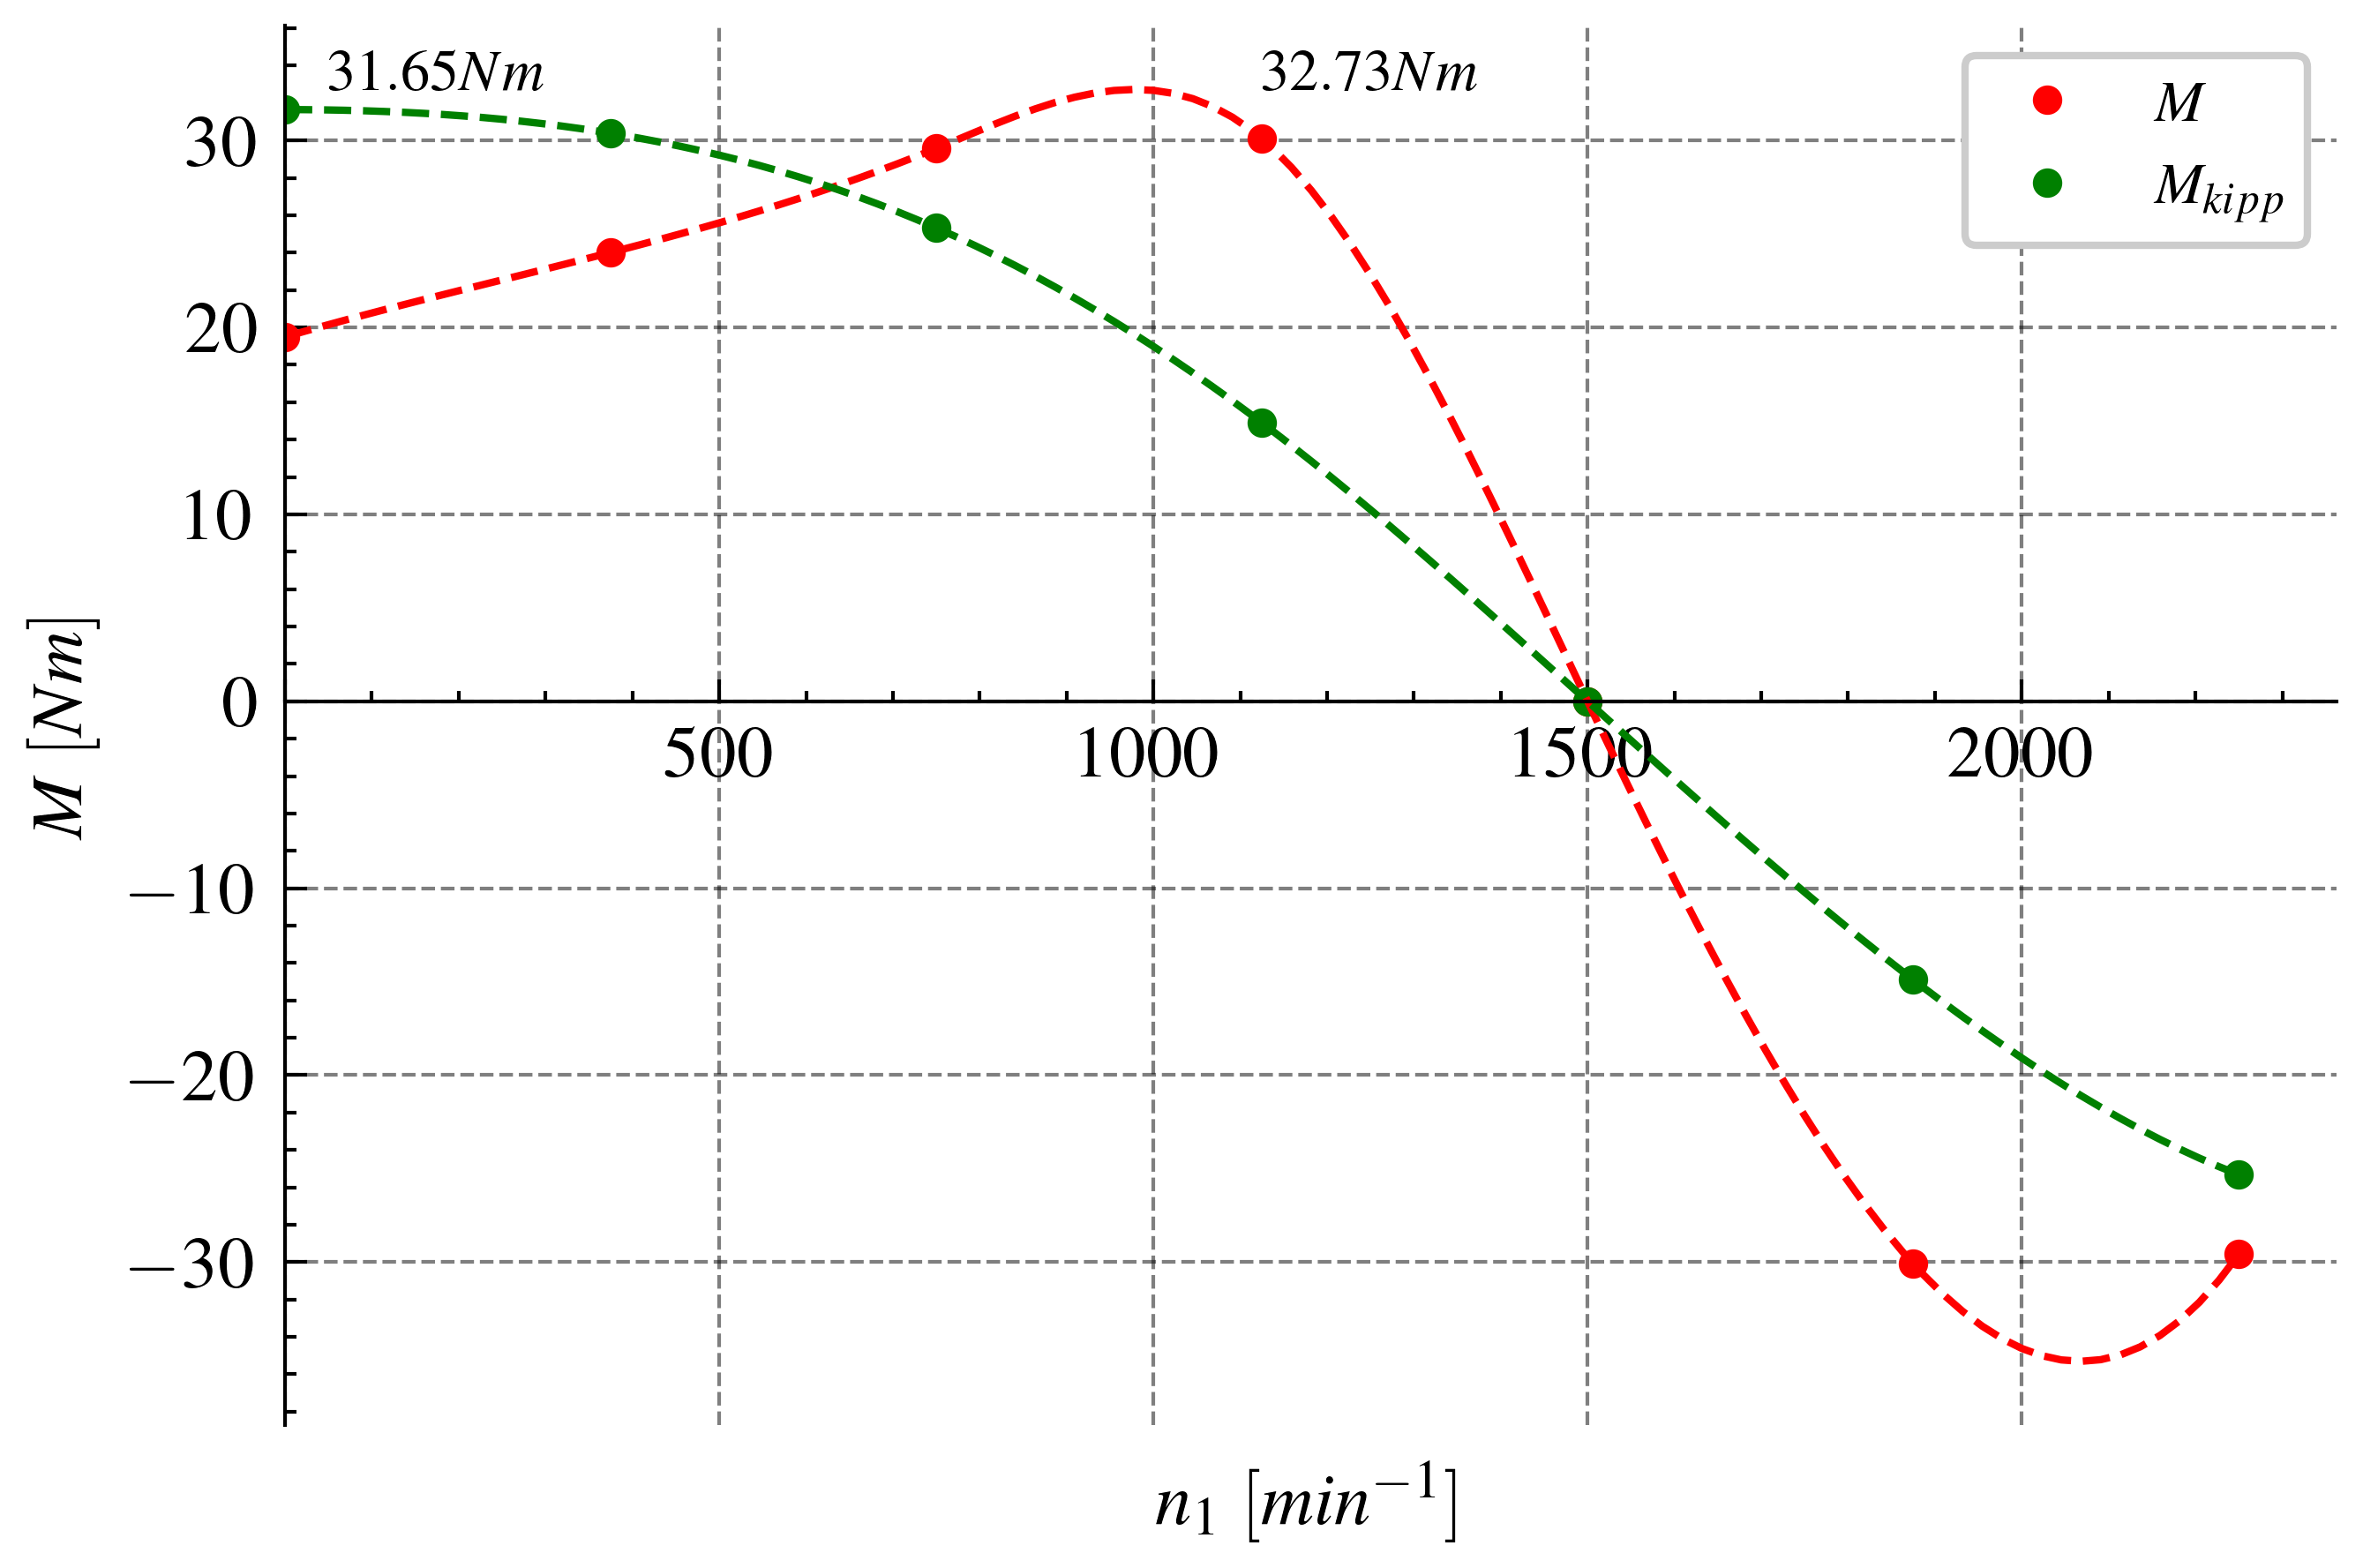

In [15]:

model = interp1d(data_n1, expr_M_lambdified(data_M_k, data_s, data_s_k), kind='cubic')
model_kipp = interp1d(data_n1, expr_M_lambdified(data_M_k, data_s, 1), kind='cubic')
xs = np.linspace(min(data_n1), max(data_n1), 100)

fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(data_n1, expr_M_lambdified(data_M_k, data_s, data_s_k), 'r.', label="$M$")
ax.plot(data_n1, expr_M_lambdified(data_M_k, data_s, 1), 'g.', label="$M_{kipp}$")
ax.plot(xs, model(xs), 'r--', )
ax.plot(xs, model_kipp(xs), 'g--', )

ax.annotate(f'${round(max(model(xs)),2)}Nm$', xy=(1125, max(model(xs))))
ax.annotate(f'${round(max(model_kipp(xs)),2)}Nm$', xy=(50, max(model(xs))))

ax.legend()

ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

# ax.axvline(x=0, color='k')
# ax.axhline(y=0, color='k')

ax.set_xlim(left=0)
ax.set_xlabel("$n_1\ [min^{-1}]$")
ax.xaxis.set_label_coords(.5, -0.025)
ax.set_ylabel("$M\ [Nm]$")


ax.get_xaxis().get_ticklabels()[0].set_visible(False)


# plt.savefig("figures/m_n-kennlinie.pdf")